In [1]:
import os,sys
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize, stats
import seaborn as sns
import json

# Figure 5: OPES KTR/EATR Results

In [2]:
true = 1.4328652141523972
E_KTR_tir = (1.30224997,2.89725116e-01)
E_EATR_tir = (1.33921840,3.74681966e-01)
Q_KTR_tir = (2.38060932,5.12116274e-01)
Q_EATR_tir = (1.43615880,8.69389462e-01)
paces = np.array([5,7,9,11,13,15])/4.184

with open('../Rates/rates_E_opes.json','r') as f:
    E_rates_data = json.load(f)

with open('../Rates/rates_Q_opes.json','r') as f:
    Q_rates_data = json.load(f)

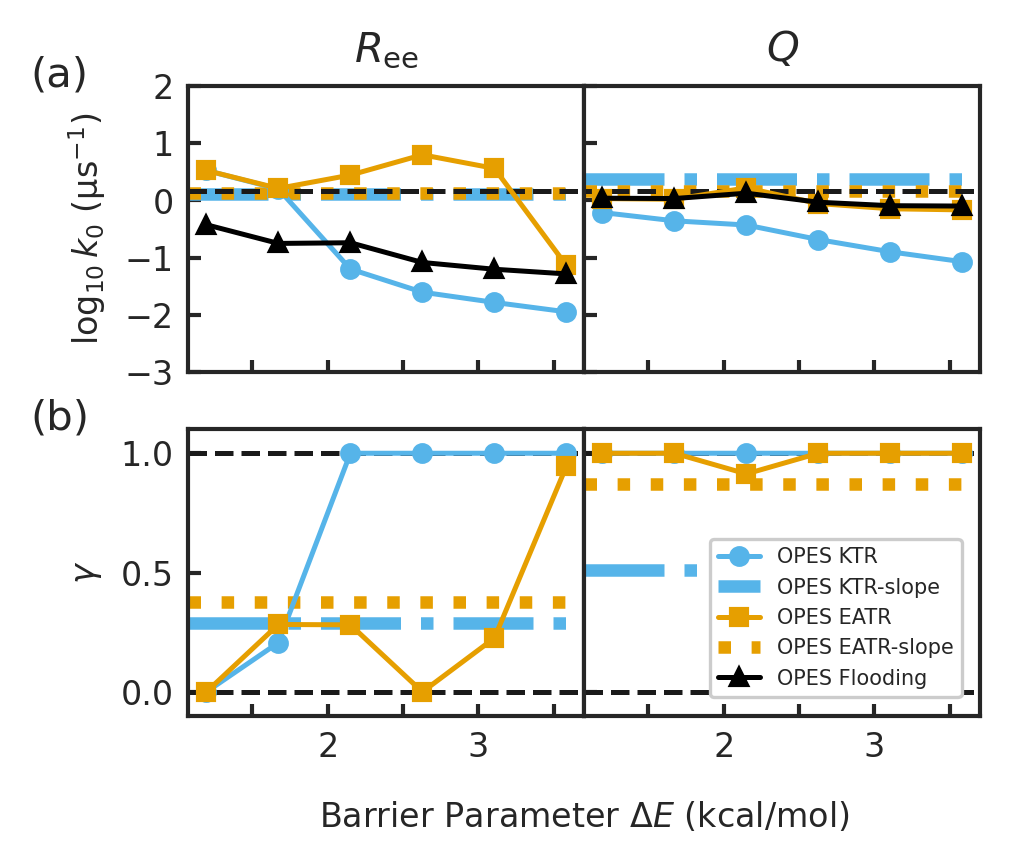

In [3]:
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper', rc={'axes.labelsize': 8, 'axes.linewidth': 1.0, 'lines.linewidth': 1.2, 'axes.titlesize': 10,
                             'xtick.labelsize': 8, 'ytick.labelsize': 8, 'xtick.major.width': 1.0, 'ytick.major.width': 1.0,
                             'legend.fontsize': 5, 'legend.framealpha': 0, 'lines.markersize': 4})

fig, axs = plt.subplots(2,2,figsize=(3.3,3),dpi=300,sharey='row',sharex=True)
fig.subplots_adjust(wspace=0,bottom=0.18,left=0.17,right=0.97)

# Rates

axs[0,0].set_ylabel('$\log_{10} k_0$ ($\mathrm{\mu s}^{-1}$)')
axs[0,0].set_yticks([-3,-2,-1,0,1,2])
axs[0,0].set_xticks([1.5,2,2.5,3,3.5],labels=['','2','','3',''])
axs[0,0].set_ylim((-3,2))
axs[0,0].text(-0.4,1.0,"(a)",fontsize=10,transform=axs[0,0].transAxes)


axs[0,0].axhline(y=np.log10(E_KTR_tir[0]),color='#56B4E9',linestyle='-.',linewidth=3.)
axs[0,0].axhline(y=np.log10(E_EATR_tir[0]),color='#E69F00',linestyle=':',linewidth=3.)
axs[0,0].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,0].plot(paces,np.log10(np.array(E_rates_data["KTR Vmb CDF k"])),marker='o',markersize=4,color='#56B4E9')
axs[0,0].plot(paces,np.log10(np.array(E_rates_data["EATR CDF k"])),marker='s',color='#E69F00')
axs[0,0].plot(paces,np.log10(np.array(E_rates_data["iMetaD CDF k"])),marker='^',color='#000000')
axs[0,0].set_title('$R_{\mathrm{ee}}$')



axs[0,1].axhline(y=np.log10(Q_KTR_tir[0]),color='#56B4E9',linestyle='-.',linewidth=3.)
axs[0,1].axhline(y=np.log10(Q_EATR_tir[0]),color='#E69F00',linestyle=':',linewidth=3.)
axs[0,1].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,1].plot(paces,np.log10(np.array(Q_rates_data["KTR Vmb CDF k"])),marker='o',markersize=4,color='#56B4E9',label='OPES KTR')
axs[0,1].plot(paces,np.log10(np.array(Q_rates_data["EATR CDF k"])),marker='s',color='#E69F00',label='OPES EATR')
axs[0,1].plot(paces,np.log10(np.array(Q_rates_data["iMetaD CDF k"])),marker='^',color='#000000',label='OPES Flooding')
axs[0,1].set_title('$Q$')

# Gamma

axs[1,0].set_ylabel('$\gamma$')
axs[1,0].set_ylim((-0.1,1.1))
axs[1,0].text(-0.4,1.0,"(b)",fontsize=10,transform=axs[1,0].transAxes)

axs[1,0].axhline(y=1,color='k',linestyle='--')
axs[1,0].axhline(y=0,color='k',linestyle='--')
axs[1,0].axhline(y=E_KTR_tir[1],color='#56B4E9',linestyle='-.',linewidth=3.)
axs[1,0].axhline(y=E_EATR_tir[1],color='#E69F00',linestyle=':',linewidth=3.)
axs[1,0].plot(paces,np.array(E_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs[1,0].plot(paces,np.array(E_rates_data["EATR CDF g"]),marker='s',color='#E69F00')


axs[1,1].axhline(y=1,color='k',linestyle='--')
axs[1,1].axhline(y=0,color='k',linestyle='--')
axs[1,1].plot(paces,np.array(Q_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9',label='OPES KTR')
axs[1,1].axhline(y=Q_KTR_tir[1],color='#56B4E9',linestyle='-.',label='OPES KTR-slope',linewidth=3.)
axs[1,1].plot(paces,np.array(Q_rates_data["EATR CDF g"]),marker='s',color='#E69F00',label='OPES EATR')
axs[1,1].axhline(y=Q_EATR_tir[1],color='#E69F00',linestyle=':',label='OPES EATR-slope',linewidth=3.)
axs[1,1].plot(paces,np.log10(np.array(Q_rates_data["iMetaD CDF k"]))+100,marker='^',color='#000000',label='OPES Flooding')
axs[1,1].legend(loc='lower right',borderaxespad=0.9,framealpha=1.)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

for ax in axs.flatten():
    ax.tick_params(axis='both', direction='in', which='both', length=3)
plt.xlabel('Barrier Parameter $\Delta E$ (kcal/mol)')

plt.savefig("EATR_Fig5.pdf",format='pdf')

# Figure S7: OPES-Slope

In [6]:
true = 1.4328652141523972
speedup_Q = []
speedup_Q_metad = []
speedup_E = []
speedup_E_metad = []
#paces = [20,50,100,200,500,1000]

for pace in ["qruns_barr5","qruns_barr7","qruns_barr9","qruns_barr11","qruns_barr13","qruns_barr15"]:
    final_times = np.loadtxt(f"../../Data/Q_frac_native_contacts_opes/{pace}/trans_times.dat", usecols=(0,3))
    speedup_Q.append((1/(true*1e-6)) / np.mean(final_times[:,0]))

for pace in ["qruns_pace1e2","qruns_pace1e3","qruns_pace1e4","qruns_pace2e4","qruns_pace5e4","qruns_pace1e5","qruns_pace5e5","qruns_pace1e6"]:
    final_times = np.loadtxt(f"../../Data/Q_frac_native_contacts_wt/{pace}/trans_times.dat", usecols=(0,3))
    speedup_Q_metad.append((1/(true*1e-6)) / np.mean(final_times[:,0]))

with open('../Rates/rates_Q_wt.json','r') as f:
    Q_rates_data_metad = json.load(f)


for pace in ["eruns_barr5","eruns_barr7","eruns_barr9","eruns_barr11","eruns_barr13","eruns_barr15"]:
    final_times = np.loadtxt(f"../../Data/E_end_end_distance_opes/{pace}/trans_times.dat", usecols=(0,3))
    speedup_E.append((1/(true*1e-6)) / np.mean(final_times[:,0]))

for pace in ["eruns_pace1e2","eruns_pace1e3","eruns_pace1e4","eruns_pace2e4","eruns_pace5e4","eruns_pace1e5","eruns_pace5e5","eruns_pace1e6"]:
    final_times = np.loadtxt(f"../../Data/E_end_end_distance_wt/{pace}/trans_times.dat", usecols=(0,3))
    speedup_E_metad.append((1/(true*1e-6)) / np.mean(final_times[:,0]))

with open('../Rates/rates_E_wt.json','r') as f:
    E_rates_data_metad = json.load(f)

In [7]:
data_Q = np.loadtxt('../../Scripts/rate_batch_scripts/Q_slope.out',skiprows=9)
data_E = np.loadtxt('../../Scripts/rate_batch_scripts/E_slope.out',skiprows=9)

In [8]:
xs_EATR_Q = np.linspace(0,5,100)
xs_KTR_Q = np.linspace(0,7,100)
ys_EATR_Q = 8.69389462e-01*xs_EATR_Q + np.log(1.43615880e-06)
ys_KTR_Q = 5.12116274e-01*xs_KTR_Q + np.log(2.38060932e-06)

xs_EATR_E = np.linspace(0,6,100)
xs_KTR_E = np.linspace(0,8,100)
ys_EATR_E = 3.74681976e-01*xs_EATR_E + np.log(1.33921833e-06)
ys_KTR_E = 2.89725114e-01*xs_KTR_E + np.log(1.30224999e-06)

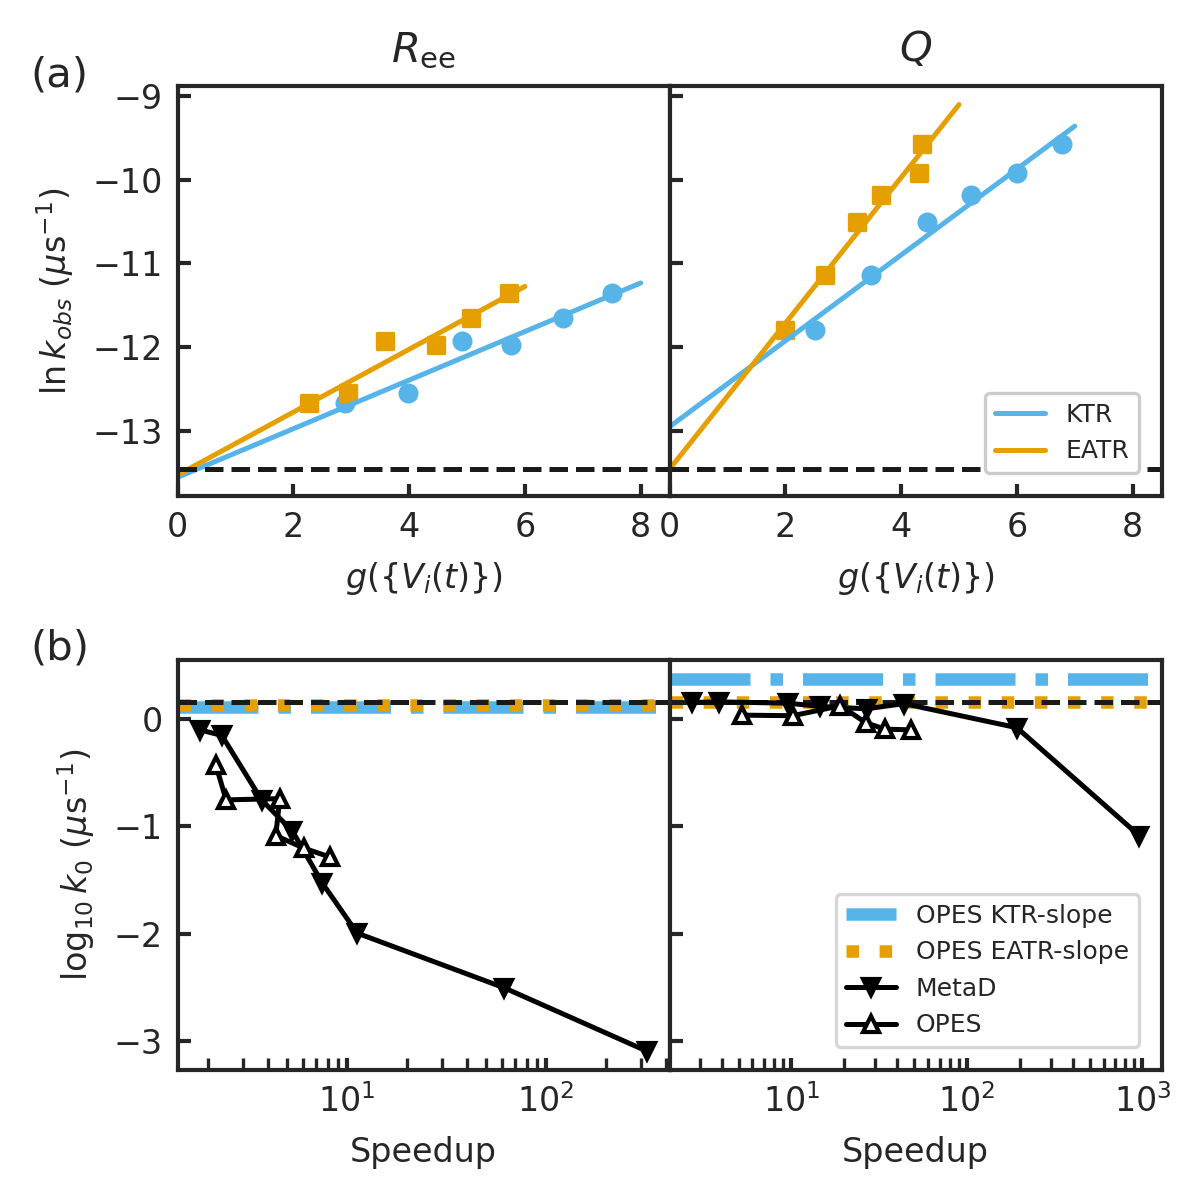

In [9]:
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper', rc={'axes.labelsize': 8, 'axes.linewidth': 1.0, 'lines.linewidth': 1.2, 'axes.titlesize': 10,
                             'xtick.labelsize': 8, 'ytick.labelsize': 8, 'xtick.major.width': 1.0, 'ytick.major.width': 1.0,
                             'legend.fontsize': 6, 'legend.framealpha': 0, 'lines.markersize': 4})

fig, axs = plt.subplots(2,2,figsize=(4,4),dpi=300,sharey='row')
fig.subplots_adjust(wspace=0,hspace=0.4,top=0.92,bottom=0.1,left=0.15,right=0.97)

axs[0,0].set_title('$R_\\mathrm{ee}$')
axs[0,0].set_xlabel('$g(\\{V_i(t)\\})$')
axs[0,0].set_ylabel('$\\ln k_{obs}$ ($\mu\mathrm{s}^{-1}$)')
axs[0,0].set_xlim((0,8.5))
axs[0,0].set_xticks([0,2,4,6,8])

axs[0,0].scatter(data_E[:,0],np.log(data_E[:,2]),color='#56B4E9')
axs[0,0].scatter(data_E[:,1],np.log(data_E[:,2]),color='#E69F00',marker='s')
axs[0,0].plot(xs_KTR_E,ys_KTR_E,label='KTR',color='#56B4E9')
axs[0,0].plot(xs_EATR_E,ys_EATR_E,label='EATR',color='#E69F00')
axs[0,0].axhline(np.log(1.4328652141523972e-6),color='k',linestyle='--')
axs[0,0].text(-0.3,1.0,"(a)",fontsize=10,transform=axs[0,0].transAxes)

axs[0,1].set_title('$Q$')
axs[0,1].set_xlabel('$g(\\{V_i(t)\\})$')
axs[0,1].set_xlim((0,8.5))
axs[0,1].set_xticks([0,2,4,6,8])
#axs[1].set_ylabel('$\\ln k_0$')

axs[0,1].scatter(data_Q[:,0],np.log(data_Q[:,2]),color='#56B4E9')
axs[0,1].scatter(data_Q[:,1],np.log(data_Q[:,2]),color='#E69F00',marker='s')
axs[0,1].plot(xs_KTR_Q,ys_KTR_Q,label='KTR',color='#56B4E9')
axs[0,1].plot(xs_EATR_Q,ys_EATR_Q,label='EATR',color='#E69F00')
axs[0,1].axhline(np.log(1.4328652141523972e-6),color='k',linestyle='--')
axs[0,1].legend(loc='lower right',borderaxespad=0.9,framealpha=1.)

#axs[1,1].set_title('$Q$')
axs[1,0].set_xlabel('Speedup')
axs[1,0].set_ylabel('$\log_{10} k_0$ ($\mu\mathrm{s}^{-1}$)')
#axs[0].set_yticks([-4,-2,0,2])
axs[1,0].set_xscale('log')
#axs[0].set_yscale('log')
#axs[0].set_xlim((3e0,1e2))
#axs[0].set_ylim((5e-1,2e0))

axs[1,0].text(-0.3,1.0,"(b)",fontsize=10,transform=axs[1,0].transAxes)

axs[1,1].axhline(y=np.log10(2.38060932),color='#56B4E9',linestyle='-.',label='OPES KTR-slope',linewidth=3)
axs[1,1].axhline(y=np.log10(1.43615880),color='#E69F00',linestyle=':',label='OPES EATR-slope',linewidth=3)
axs[1,1].axhline(y=np.log10(true),color='k',linestyle='--')
axs[1,1].plot(speedup_Q_metad,np.log10(np.array(Q_rates_data_metad["iMetaD CDF k"])*1e6),marker='v',color='#000000',label='MetaD')
axs[1,1].plot(speedup_Q,np.log10(np.array(Q_rates_data["iMetaD CDF k"])),marker='^',color='#000000',mfc='#FFFFFF',label='OPES')

#axs[1,0].set_title('$R_\\mathrm{ee}$')
axs[1,1].set_xlabel('Speedup')
#axs[1].set_ylabel('$\gamma$')
axs[1,1].set_xscale('log')
#axs[1].set_ylim((-0.1,1.1))
#axs[1].set_yticks([0,0.5,1],labels=["","",""])

axs[1,0].axhline(y=np.log10(1.30224997),color='#56B4E9',linestyle='-.',linewidth=3)
axs[1,0].axhline(y=np.log10(1.33921840),color='#E69F00',linestyle=':',linewidth=3)
axs[1,0].axhline(y=np.log10(true),color='k',linestyle='--')
axs[1,0].plot(speedup_E_metad,np.log10(np.array(E_rates_data_metad["iMetaD CDF k"])*1e6),marker='v',color='#000000',label='MetaD')
axs[1,0].plot(speedup_E,np.log10(np.array(E_rates_data["iMetaD CDF k"])),marker='^',color='#000000',mfc='#FFFFFF',label='OPES')
axs[1,1].legend(loc='lower right',borderaxespad=0.9)

for ax in axs.flatten():
    ax.tick_params(axis='both', direction='in', which='both', length=3)

plt.savefig("EATR_FigS7.pdf",format='pdf')